# 1. Importing packages

In [1]:
import numpy as np
import pandas as pd
import sklearn
import imblearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn.decomposition import FastICA 
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

# 2. Load Dataset

In [2]:
# Reference: https://sites.google.com/a/uah.edu/tommy-morris-uah/ics-data-sets

# read contents of csv file
data_old = pd.read_csv('Gaspipelinedatasetfull.csv')

# adding header
#headerList = ['address', 'function', 'length', 'setpoint', 'gain', 'reset rate', 'deadband', 'cycle time', 'rate', 'system mode', 'control scheme', 'pump', 'solenoid', 'pressure measurement', 'crc rate', 'command response', 'time', 'binary result', 'categorized result', 'specific result']
headerList = ['command_address', 'response_address', 'command_memory', 'response_memory', 'command_memory_count', 'response_memory_count', 'comm_read_function', 'comm_write_fun', 'resp_read_fun', 'resp_write_fun', 'sub_function', 'command_length', 'resp_length', 'gain', 'reset', 'deadband', 'cycletime', 'rate', 'setpoint', 'control_mode', 'control_scheme', 'pump', 'solenoid', 'crc_rate', 'measurement', 'time', 'result']

# converting data frame to csv
data_old.to_csv("Gaspipelinedatasetfull.csv", header=headerList, index=False)

# 3. Separate features from label

In [3]:
x_old = data_old.loc[ : , data_old.columns != 'result']
y_old = data_old['result']

# 4. Dataset Pre-processing

### 4.1 Check Missing values in features

In [4]:
# find missing values
x_old.isnull().values.any()

False

### 4.2 Feature Scaling

In [5]:
x_old_scaled = StandardScaler().fit_transform(x_old)

print("Imbalanced data mean: ", x_old_scaled.mean())
print("Imbalanced data std: ", x_old_scaled.std())

Imbalanced data mean:  5.85905902624338e-17
Imbalanced data std:  0.8320502943378436


### 4.3 Feature Selection

#### 4.3.1 PCA dimension reduction function

In [6]:
# create a PCA object
# make an instance of the Model

def feature_selection_pca(data,x,y):
    pca_95 = PCA(n_components=1, random_state=2020)
    
    # fit PCA on training set. Fitting PCA on the training set only
    pca_95.fit(x)

    # apply the mapping (transform) to both the training set and the test set
    x_pca_95 = pca_95.transform(x)
    
    # create a pandas DataFrame using the values of all principal components 
    # and add the label column of the original dataset
    data_pca = pd.DataFrame(x_pca_95, columns=['feature_1'])
    data_pca['label1'] = data.result
    #data_pca.head()
    #print(data_pca.shape)
    data_pca.to_csv('HMLIDS_91122_pca.csv', index=False)
    selectedfeature_pca = data_pca['feature_1'].tolist()
    
    return selectedfeature_pca

#### 4.3.2 CCA dimension reduction function

In [7]:
# CCA dimension reduction

def feature_selection_cca(data,x,y):
    cca = CCA(n_components=1)
    cca.fit(x, y)
    x_cca, y_cca = cca.transform(x, y)
    #print(x_cca.shape)
    # create a pandas DataFrame using the values of all principal components 
    # and add the label column of the original dataset
    data_cca = pd.DataFrame(x_cca, columns=['feature_2'])
    data_cca['label2'] = data.result
    #data_cca.head()
    #print(data_cca.shape)
    data_cca.to_csv('HMLIDS_91122_cca.csv', index=False)
    selectedfeature_cca = data_cca['feature_2'].tolist()
    
    return selectedfeature_cca

#### 4.3.3 ICA dimension reduction function

In [8]:
# ICA dimension reduction

def feature_selection_ica(data,x,y):
    ICA = FastICA(n_components=1, random_state=12) 
    x_ica=ICA.fit_transform(x)
    #print(x_ica.shape)
    
    # create a pandas DataFrame using the values of all principal components 
    # and add the label column of the original dataset
    data_ica = pd.DataFrame(x_ica, columns=['feature_3'])
    data_ica['label3'] = data.result
    #data_ica.head()
    #print(data_ica.shape)
    data_ica.to_csv('HMLIDS_91122_ica.csv', index=False)
    selectedfeature_ica = data_ica['feature_3'].tolist()
    
    return selectedfeature_ica

#### 4.3.4 Combine features from all the previous techniques 

In [9]:
# Combine all the previous techniques 
FS_pca_old = feature_selection_pca(data_old,x_old_scaled,y_old)
FS_cca_old = feature_selection_cca(data_old,x_old_scaled,y_old)
FS_ica_old = feature_selection_ica(data_old,x_old_scaled,y_old)

data_old_FS = pd.DataFrame()
data_old_FS['FS_pca'] = np.array(FS_pca_old)
data_old_FS['FS_cca'] = np.array(FS_cca_old)
data_old_FS['FS_ica'] = np.array(FS_ica_old)
data_old_FS['label'] = y_old
display(data_old_FS)
data_old_FS.to_csv('HMLIDS_91122_old_FS.csv', index=False)

,FS_pca,FS_cca,FS_ica,label
0,-0.442327,-0.491780,0.000616,0
1,-0.947158,-0.488872,0.001318,0
2,-0.607825,-0.490826,0.000846,0
3,-0.928125,-0.488981,0.001292,0
4,-0.508429,-0.491399,0.000708,0
...,...,...,...,...
97013,-0.724130,-0.874770,0.001008,0
97014,-0.358612,-0.876875,0.000499,0
97015,-0.640920,-0.875249,0.000892,0
97016,-0.307674,-0.877169,0.000428,0


In [10]:
data_old_FS.shape

(97018, 4)

# 5. Extract features & labels of normal & each attack type

In [11]:
###### NORMAL
data_old_FS_normal = data_old_FS.loc[(data_old_FS['label'] == 0)]
## PCA
x_old_FS_normal_pca = data_old_FS_normal.loc[ : , data_old_FS_normal.columns == 'FS_pca']
y_old_FS_normal_pca = data_old_FS_normal['label']
## CCA
x_old_FS_normal_cca = data_old_FS_normal.loc[ : , data_old_FS_normal.columns == 'FS_cca']
y_old_FS_normal_cca = data_old_FS_normal['label']
## ICA
x_old_FS_normal_ica = data_old_FS_normal.loc[ : , data_old_FS_normal.columns == 'FS_ica']
y_old_FS_normal_ica = data_old_FS_normal['label']


###### NMRI
data_old_FS_NMRI = data_old_FS.loc[(data_old_FS['label'] == 1)]
## PCA
x_old_FS_NMRI_pca = data_old_FS_NMRI.loc[ : , data_old_FS_NMRI.columns == 'FS_pca']
y_old_FS_NMRI_pca = data_old_FS_NMRI['label']
## CCA
x_old_FS_NMRI_cca = data_old_FS_NMRI.loc[ : , data_old_FS_NMRI.columns == 'FS_cca']
y_old_FS_NMRI_cca = data_old_FS_NMRI['label']
## ICA
x_old_FS_NMRI_ica = data_old_FS_NMRI.loc[ : , data_old_FS_NMRI.columns == 'FS_ica']
y_old_FS_NMRI_ica = data_old_FS_NMRI['label']


###### CMRI
data_old_FS_CMRI = data_old_FS.loc[(data_old_FS['label'] == 2)]
## PCA
x_old_FS_CMRI_pca = data_old_FS_CMRI.loc[ : , data_old_FS_CMRI.columns == 'FS_pca']
y_old_FS_CMRI_pca = data_old_FS_CMRI['label']
## CCA
x_old_FS_CMRI_cca = data_old_FS_CMRI.loc[ : , data_old_FS_CMRI.columns == 'FS_cca']
y_old_FS_CMRI_cca = data_old_FS_CMRI['label']
## ICA
x_old_FS_CMRI_ica = data_old_FS_CMRI.loc[ : , data_old_FS_CMRI.columns == 'FS_ica']
y_old_FS_CMRI_ica = data_old_FS_CMRI['label']


###### MSCI
data_old_FS_MSCI = data_old_FS.loc[(data_old_FS['label'] == 2)]
## PCA
x_old_FS_MSCI_pca = data_old_FS_MSCI.loc[ : , data_old_FS_MSCI.columns == 'FS_pca']
y_old_FS_MSCI_pca = data_old_FS_MSCI['label']
## CCA
x_old_FS_MSCI_cca = data_old_FS_MSCI.loc[ : , data_old_FS_MSCI.columns == 'FS_cca']
y_old_FS_MSCI_cca = data_old_FS_MSCI['label']
## ICA
x_old_FS_MSCI_ica = data_old_FS_MSCI.loc[ : , data_old_FS_MSCI.columns == 'FS_ica']
y_old_FS_MSCI_ica = data_old_FS_MSCI['label']


###### MPCI
data_old_FS_MPCI = data_old_FS.loc[(data_old_FS['label'] == 3)]
## PCA
x_old_FS_MPCI_pca = data_old_FS_MPCI.loc[ : , data_old_FS_MPCI.columns == 'FS_pca']
y_old_FS_MPCI_pca = data_old_FS_MPCI['label']
## CCA
x_old_FS_MPCI_cca = data_old_FS_MPCI.loc[ : , data_old_FS_MPCI.columns == 'FS_cca']
y_old_FS_MPCI_cca = data_old_FS_MPCI['label']
## ICA
x_old_FS_MPCI_ica = data_old_FS_MPCI.loc[ : , data_old_FS_MPCI.columns == 'FS_ica']
y_old_FS_MPCI_ica = data_old_FS_MPCI['label']


###### MFCI
data_old_FS_MFCI = data_old_FS.loc[(data_old_FS['label'] == 4)]
## PCA
x_old_FS_MFCI_pca = data_old_FS_MFCI.loc[ : , data_old_FS_MFCI.columns == 'FS_pca']
y_old_FS_MFCI_pca = data_old_FS_MFCI['label']
## CCA
x_old_FS_MFCI_cca = data_old_FS_MFCI.loc[ : , data_old_FS_MFCI.columns == 'FS_cca']
y_old_FS_MFCI_cca = data_old_FS_MFCI['label']
## ICA
x_old_FS_MFCI_ica = data_old_FS_MFCI.loc[ : , data_old_FS_MFCI.columns == 'FS_ica']
y_old_FS_MFCI_ica = data_old_FS_MFCI['label']


###### DoS
data_old_FS_DoS = data_old_FS.loc[(data_old_FS['label'] == 1)]
## PCA
x_old_FS_DoS_pca = data_old_FS_DoS.loc[ : , data_old_FS_DoS.columns == 'FS_pca']
y_old_FS_DoS_pca = data_old_FS_DoS['label']
## CCA
x_old_FS_DoS_cca = data_old_FS_DoS.loc[ : , data_old_FS_DoS.columns == 'FS_cca']
y_old_FS_DoS_cca = data_old_FS_DoS['label']
## ICA
x_old_FS_DoS_ica = data_old_FS_DoS.loc[ : , data_old_FS_DoS.columns == 'FS_ica']
y_old_FS_DoS_ica = data_old_FS_DoS['label']


###### Recon
data_old_FS_Recon = data_old_FS.loc[(data_old_FS['label'] == 1)]
## PCA
x_old_FS_Recon_pca = data_old_FS_Recon.loc[ : , data_old_FS_Recon.columns == 'FS_pca']
y_old_FS_Recon_pca = data_old_FS_Recon['label']
## CCA
x_old_FS_Recon_cca = data_old_FS_Recon.loc[ : , data_old_FS_Recon.columns == 'FS_cca']
y_old_FS_Recon_cca = data_old_FS_Recon['label']
## ICA
x_old_FS_Recon_ica = data_old_FS_Recon.loc[ : , data_old_FS_Recon.columns == 'FS_ica']
y_old_FS_Recon_ica = data_old_FS_Recon['label']



###### Aggregated Attacks
data_old_FS_agg_attacks = data_old_FS.loc[(data_old_FS['label'] != 0)]
## PCA
x_old_FS_agg_attacks_pca = data_old_FS_agg_attacks.loc[ : , data_old_FS_agg_attacks.columns == 'FS_pca']
y_old_FS_agg_attacks_pca = data_old_FS_agg_attacks['label']
## CCA
x_old_FS_agg_attacks_cca = data_old_FS_agg_attacks.loc[ : , data_old_FS_agg_attacks.columns == 'FS_cca']
y_old_FS_agg_attacks_cca = data_old_FS_agg_attacks['label']
## ICA
x_old_FS_agg_attacks_ica = data_old_FS_agg_attacks.loc[ : , data_old_FS_agg_attacks.columns == 'FS_ica']
y_old_FS_agg_attacks_ica = data_old_FS_agg_attacks['label']

# 6. Class Balancing

# 6.1 Balancing aggregated attacks

In [12]:
def overSamplingTech(x, y):
    o = RandomOverSampler()
    x_t, y_t = o.fit_resample(x, y)
    return x_t, y_t

x_balanced_FS_agg_attacks_pca, y_balanced_FS_agg_attacks_pca = overSamplingTech(x_old_FS_agg_attacks_pca, y_old_FS_agg_attacks_pca)
x_balanced_FS_agg_attacks_cca, y_balanced_FS_agg_attacks_cca = overSamplingTech(x_old_FS_agg_attacks_cca, y_old_FS_agg_attacks_cca)
x_balanced_FS_agg_attacks_ica, y_balanced_FS_agg_attacks_ica = overSamplingTech(x_old_FS_agg_attacks_ica, y_old_FS_agg_attacks_ica)

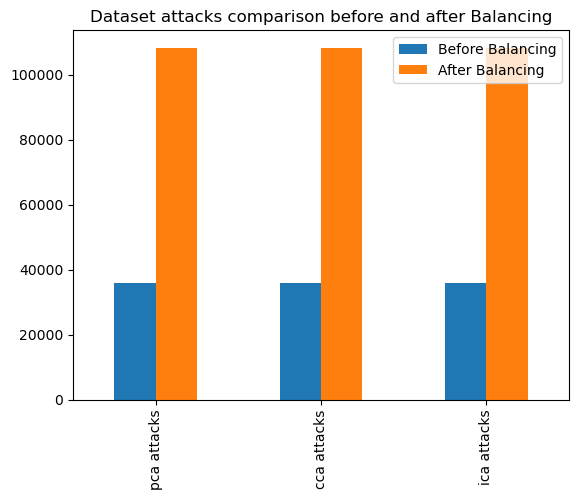

[35863, 35863, 35863]
[108262, 108262, 108262]


In [13]:
list_y_old = []
list_y_old.append((y_old_FS_agg_attacks_pca.shape)[0])
list_y_old.append((y_old_FS_agg_attacks_cca.shape)[0])
list_y_old.append((y_old_FS_agg_attacks_ica.shape)[0])
list_y_balanced = []
list_y_balanced.append((y_balanced_FS_agg_attacks_pca.shape)[0])
list_y_balanced.append((y_balanced_FS_agg_attacks_cca.shape)[0])
list_y_balanced.append((y_balanced_FS_agg_attacks_ica.shape)[0])
    
# initialize data of lists
data_ = {'Before Balancing': list_y_old,
        'After Balancing': list_y_balanced}
index = ['pca attacks', 'cca attacks', 'ica attacks'] 

# Creates pandas DataFrame
df = pd.DataFrame(data = data_, index=index)
df.plot.bar(title='Dataset attacks comparison before and after Balancing')
plt.show(block=True)

print(list_y_old)
print(list_y_balanced)

# 5. Binary labels Dataset

In [14]:
y_old_FS_agg_attacks_pca_binary = y_old_FS_agg_attacks_pca.copy()
y_old_FS_agg_attacks_pca_binary.iloc[:] = 1

y_old_FS_agg_attacks_cca_binary = y_old_FS_agg_attacks_cca.copy()
y_old_FS_agg_attacks_cca_binary.iloc[:] = 1

y_old_FS_agg_attacks_ica_binary = y_old_FS_agg_attacks_ica.copy()
y_old_FS_agg_attacks_ica_binary.iloc[:] = 1


y_balanced_FS_agg_attacks_pca_binary = y_balanced_FS_agg_attacks_pca.copy()
y_balanced_FS_agg_attacks_pca_binary.iloc[:] = 1

y_balanced_FS_agg_attacks_cca_binary = y_balanced_FS_agg_attacks_cca.copy()
y_balanced_FS_agg_attacks_cca_binary.iloc[:] = 1

y_balanced_FS_agg_attacks_ica_binary = y_balanced_FS_agg_attacks_ica.copy()
y_balanced_FS_agg_attacks_ica_binary.iloc[:] = 1

# 6.1 Balancing aggregated attacks with normal attacks

In [15]:
# Add balanced aggregated attacks features & labels to normal instances 
## PCA

x_old_FS_normal_agg_pca = pd.concat([x_old_FS_normal_pca, x_balanced_FS_agg_attacks_pca])
y_old_FS_normal_agg_pca = pd.concat([y_old_FS_normal_pca, y_balanced_FS_agg_attacks_pca_binary])

## CCA
x_old_FS_normal_agg_cca = pd.concat([x_old_FS_normal_cca, x_balanced_FS_agg_attacks_cca])
y_old_FS_normal_agg_cca = pd.concat([y_old_FS_normal_pca, y_balanced_FS_agg_attacks_cca_binary])

## ICA
x_old_FS_normal_agg_ica = pd.concat([x_old_FS_normal_ica, x_balanced_FS_agg_attacks_ica])
y_old_FS_normal_agg_ica = pd.concat([y_old_FS_normal_pca, y_balanced_FS_agg_attacks_ica_binary])

x_balanced_FS_normal_agg_pca, y_balanced_FS_normal_agg_pca = overSamplingTech(x_old_FS_normal_agg_pca, y_old_FS_normal_agg_pca)
x_balanced_FS_normal_agg_cca, y_balanced_FS_normal_agg_cca = overSamplingTech(x_old_FS_normal_agg_cca, y_old_FS_normal_agg_cca)
x_balanced_FS_normal_agg_ica, y_balanced_FS_normal_agg_ica = overSamplingTech(x_old_FS_normal_agg_ica, y_old_FS_normal_agg_ica)

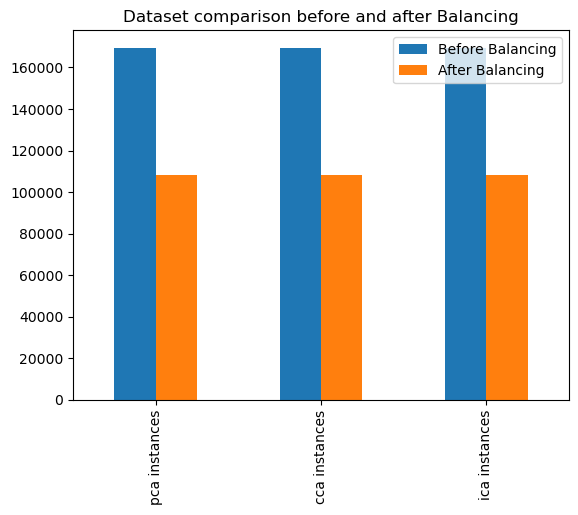

[169417, 169417, 169417]
[108262, 108262, 108262]


In [16]:
list_y_old_binary = []
list_y_old_binary.append((y_old_FS_normal_agg_pca.shape)[0])
list_y_old_binary.append((y_old_FS_normal_agg_cca.shape)[0])
list_y_old_binary.append((y_old_FS_normal_agg_ica.shape)[0])
list_y_balanced_binary = []
list_y_balanced_binary.append((y_balanced_FS_agg_attacks_pca_binary.shape)[0])
list_y_balanced_binary.append((y_balanced_FS_agg_attacks_cca_binary.shape)[0])
list_y_balanced_binary.append((y_balanced_FS_agg_attacks_ica_binary.shape)[0])
    
# initialize data of lists
data_ = {'Before Balancing': list_y_old_binary,
        'After Balancing': list_y_balanced_binary}
index = ['pca instances', 'cca instances', 'ica instances'] 

# Creates pandas DataFrame
df = pd.DataFrame(data = data_, index=index)
df.plot.bar(title='Dataset comparison before and after Balancing')
plt.show(block=True)

print(list_y_old_binary)
print(list_y_balanced_binary)

# Splitting data into training and testing sets

In [17]:
### Create training and testing sets
# Split dataset into training set and test set
# 70% training and 30% test

# for imbalanced data
x_train_balanced_pca, x_test_balanced_pca, y_train_balanced_pca, y_test_balanced_pca = train_test_split(x_balanced_FS_normal_agg_pca, y_balanced_FS_normal_agg_pca, test_size=0.3) 
x_train_balanced_cca, x_test_balanced_cca, y_train_balanced_cca, y_test_balanced_cca = train_test_split(x_balanced_FS_normal_agg_cca, y_balanced_FS_normal_agg_cca, test_size=0.3) 
x_train_balanced_ica, x_test_balanced_ica, y_train_balanced_ica, y_test_balanced_ica = train_test_split(x_balanced_FS_normal_agg_ica, y_balanced_FS_normal_agg_ica, test_size=0.3) 

# Classification

## 1. KNN Classification & Evaluation

In [18]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
knn_balanced_pca = KNeighborsClassifier(n_neighbors=5)
knn_balanced_cca = KNeighborsClassifier(n_neighbors=5)
knn_balanced_ica = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
knn_balanced_pca.fit(x_train_balanced_pca, y_train_balanced_pca)
knn_balanced_cca.fit(x_train_balanced_cca, y_train_balanced_cca)
knn_balanced_ica.fit(x_train_balanced_ica, y_train_balanced_ica)

# Predict the response for test dataset
y_pred_balanced_pca = knn_balanced_pca.predict(x_test_balanced_pca)
y_pred_balanced_cca = knn_balanced_cca.predict(x_test_balanced_cca)
y_pred_balanced_ica = knn_balanced_ica.predict(x_test_balanced_ica)

C:\Users\marya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\marya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

              precision    recall  f1-score   support

           0       0.81      0.77      0.79     32462
           1       0.78      0.81      0.80     32496

    accuracy                           0.79     64958
   macro avg       0.79      0.79      0.79     64958
weighted avg       0.79      0.79      0.79     64958



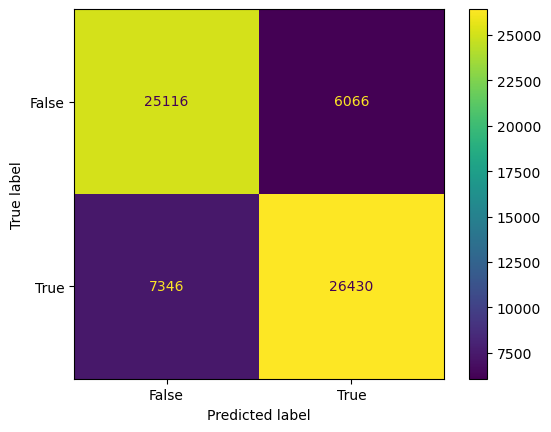

In [19]:
# Model Evaluation for k=5
print(classification_report(y_test_balanced_pca, y_pred_balanced_pca))
confusion_matrix_knn_pca = metrics.confusion_matrix(y_pred_balanced_pca,y_test_balanced_pca)
cm_display_knn_pca = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn_pca, display_labels = [False, True])
cm_display_knn_pca.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     32481
           1       0.92      0.96      0.94     32477

    accuracy                           0.94     64958
   macro avg       0.94      0.94      0.94     64958
weighted avg       0.94      0.94      0.94     64958



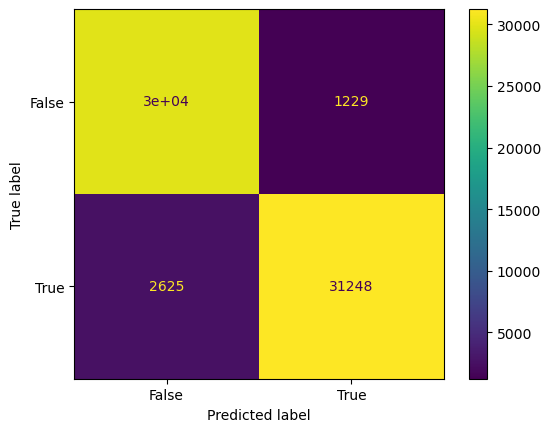

In [20]:
print(classification_report(y_test_balanced_cca, y_pred_balanced_cca))
confusion_matrix_knn_cca = metrics.confusion_matrix(y_pred_balanced_cca,y_test_balanced_cca)
cm_display_knn_cca = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn_cca, display_labels = [False, True])
cm_display_knn_cca.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.77      0.79     32436
           1       0.78      0.81      0.80     32522

    accuracy                           0.79     64958
   macro avg       0.79      0.79      0.79     64958
weighted avg       0.79      0.79      0.79     64958



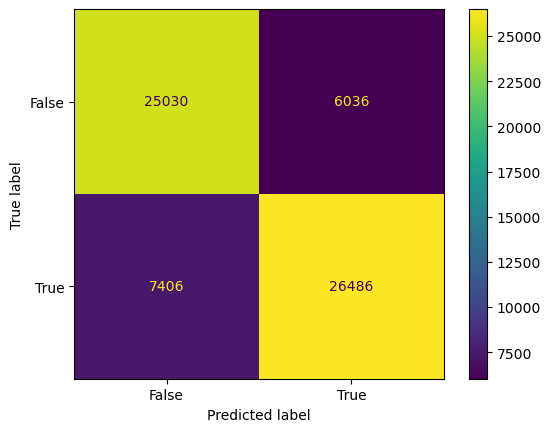

In [21]:
print(classification_report(y_test_balanced_ica, y_pred_balanced_ica))
confusion_matrix_knn_ica = metrics.confusion_matrix(y_pred_balanced_ica,y_test_balanced_ica)
cm_display_knn_ica = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn_ica, display_labels = [False, True])
cm_display_knn_ica.plot()
plt.show()

## 2. SVM Classification & Evaluation

In [22]:
# Import svm model
from sklearn import svm

# Create an svm Classifier
# Linear Kernel
svm_balanced_pca = svm.SVC(kernel='linear')
svm_balanced_cca = svm.SVC(kernel='linear')
svm_balanced_ica = svm.SVC(kernel='linear')

# Train the model using the training sets
svm_balanced_pca.fit(x_train_balanced_pca, y_train_balanced_pca)
svm_balanced_cca.fit(x_train_balanced_cca, y_train_balanced_cca)
svm_balanced_ica.fit(x_train_balanced_ica, y_train_balanced_ica)

# Predict the response for test dataset
y_pred_pca = svm_balanced_pca.predict(x_test_balanced_pca)
y_pred_cca = svm_balanced_cca.predict(x_test_balanced_cca)
y_pred_ica = svm_balanced_ica.predict(x_test_balanced_ica)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79     32462
           1       0.78      0.81      0.80     32496

    accuracy                           0.79     64958
   macro avg       0.79      0.79      0.79     64958
weighted avg       0.79      0.79      0.79     64958



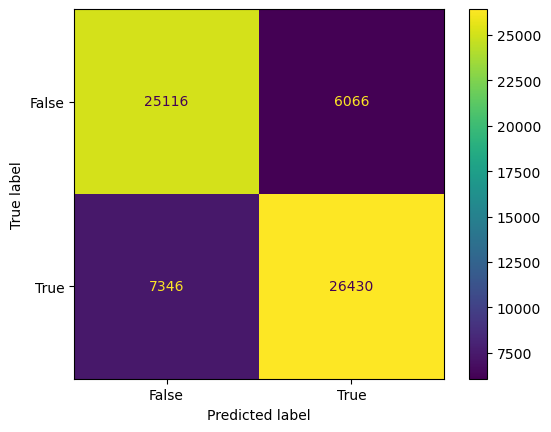

In [23]:
print(classification_report(y_test_balanced_pca, y_pred_balanced_pca))
confusion_matrix_svm_pca = metrics.confusion_matrix(y_pred_balanced_pca,y_test_balanced_pca)
cm_display_svm_pca = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svm_pca, display_labels = [False, True])
cm_display_svm_pca.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     32481
           1       0.92      0.96      0.94     32477

    accuracy                           0.94     64958
   macro avg       0.94      0.94      0.94     64958
weighted avg       0.94      0.94      0.94     64958



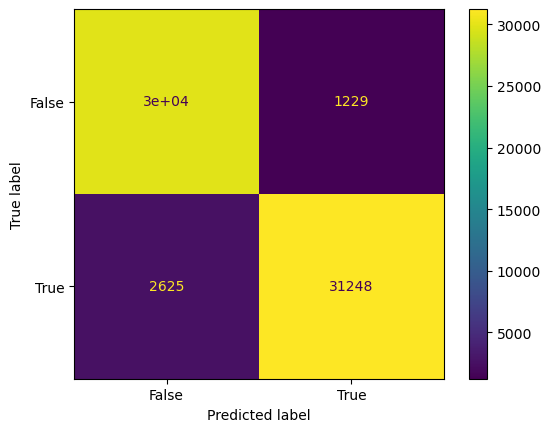

In [24]:
print(classification_report(y_test_balanced_cca, y_pred_balanced_cca))
confusion_matrix_svm_cca = metrics.confusion_matrix(y_pred_balanced_cca,y_test_balanced_cca)
cm_display_svm_cca = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svm_cca, display_labels = [False, True])
cm_display_svm_cca.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.77      0.79     32436
           1       0.78      0.81      0.80     32522

    accuracy                           0.79     64958
   macro avg       0.79      0.79      0.79     64958
weighted avg       0.79      0.79      0.79     64958



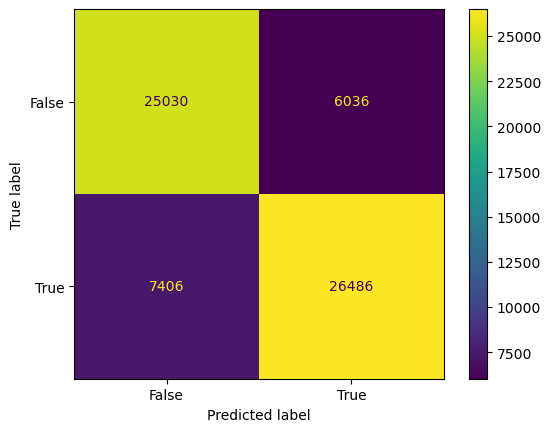

In [25]:
print(classification_report(y_test_balanced_ica, y_pred_balanced_ica))
confusion_matrix_svm_ica = metrics.confusion_matrix(y_pred_balanced_ica,y_test_balanced_ica)
cm_display_svm_ica = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svm_ica, display_labels = [False, True])
cm_display_svm_ica.plot()
plt.show()